In [1]:
# Import libraries

# Pandas for data handling
# MatPlotLib+Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/

# NumPy for numerical computing
import numpy  # https://numpy.org/
import pandas  # https://pandas.pydata.org/
import seaborn as sns

# pretty tables
from IPython.display import display

# assessment
from sklearn import model_selection  # for model comparisons
from sklearn.decomposition import PCA

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    cohen_kappa_score,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# combining
from sklearn.pipeline import make_pipeline

# data preprocessing / feature selection
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# from pandas.plotting import scatter_matrix


#########

In [2]:
print("Loading data from file ...")  # Now let's load the data
dataset = pandas.read_csv(
    "../Week #1 materials-20230125/floats.csv"
)  # default is header=infer, change if column names are not in first row
print("done \n")

print("Removing rows with missing data ...")  # Make things simple
dataset = (
    dataset.dropna()
)  # default is to drop any row that contains at least one missing value
print("done \n")

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [3]:
# Let's set up a problem: Can we predict 'callSign' using these three features: 'Depth', 'Temperature', 'Salinity' ?

print("Reading list of problem variables X and Y...")
X_name = ["Depth", "Temperature", "Salinity"]  # columns to focus on as predictors
X = dataset[X_name]  # only keep these columns as features
y_name = "callSign"  # column to focus on as target
y = dataset[y_name]  # only keep this column as label
print("done \n")

# Split-out test dataset

# We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.
seed = 42

# Train, test split
print(
    "Partitioning data into parts: formative (for development) and summative (for testing) ..."
)
test_size = 0.20  # means 20 percent

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=test_size, random_state=seed
)
print("done \n")

Reading list of problem variables X and Y...
done 

Partitioning data into parts: formative (for development) and summative (for testing) ...
done 



,Depth,Temperature,Salinity
count,8016.000000,8016.000000,8016.000000
mean,302.138099,16.229069,35.823688
std,268.402139,7.854032,0.686445
min,2.000000,4.670000,31.090000
25%,79.000000,8.680000,35.030000
50%,216.000000,16.160000,36.070000
75%,492.000000,22.900000,36.460000
max,996.000000,31.350000,36.900000


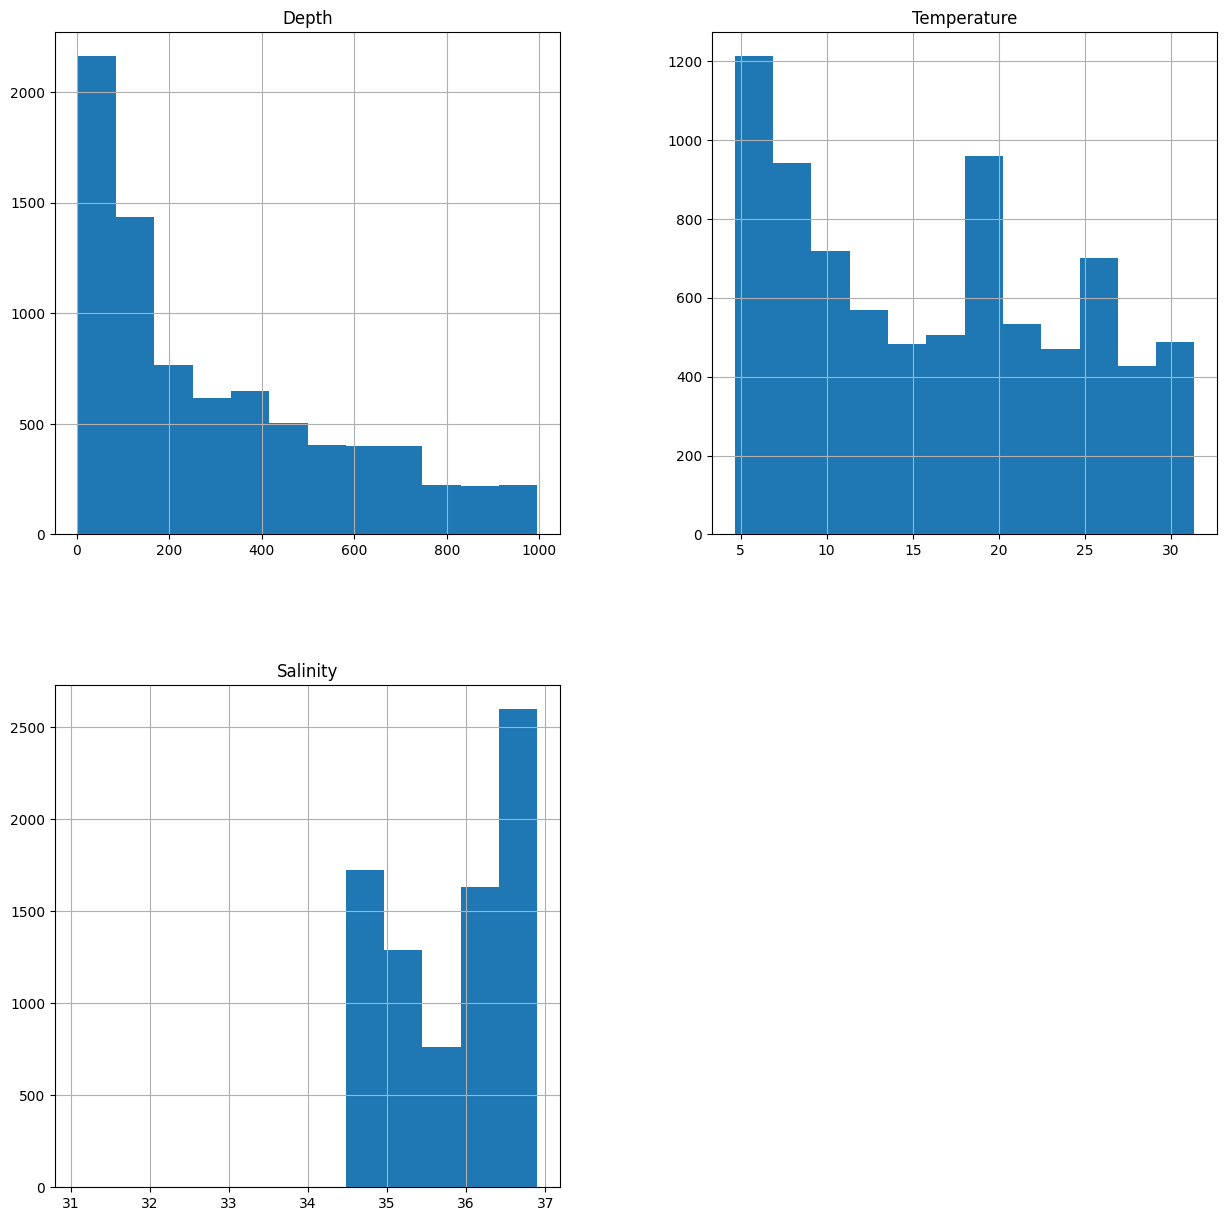

count         8016
unique          11
top       Q4901044
freq          2304
Name: callSign, dtype: object

In [4]:
# EDA

display(X_train.describe(include="all"))
X_train.hist(figsize=(15, 15), bins=12)  # bins ~= sqrt(N)
pl.show()

display(y_train.describe(include="all"))

In [5]:
# Chose the formative scoring method

print("Reading list of scoring methods to use during model development ...")
scoring = "accuracy"
print("done \n")

Reading list of scoring methods to use during model development ...
done 



In [6]:
# Chose the Algorithms

seed = 42  # setting the seed allows for repeatability

print("Reading list of algorithms to train ...")
models = []
models.append(("raw_SVM", SVC(random_state=seed)))
models.append(("scaled_SVM", make_pipeline(MinMaxScaler(), SVC(random_state=seed))))
models.append(("raw_kNN", KNeighborsClassifier()))
models.append(("scaled_kNN", make_pipeline(MinMaxScaler(), KNeighborsClassifier())))
models.append(("raw_DT", DecisionTreeClassifier(random_state=seed)))
models.append(
    (
        "scaled_DT",
        make_pipeline(MinMaxScaler(), DecisionTreeClassifier(random_state=seed)),
    )
)
print("done \n")

Reading list of algorithms to train ...
done 



In [7]:
# Now it is time to train some models on the data and estimate their accuracy on unseen data.

k4folds = 5
results = []
names = []
for name, model in models:  # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split ...")
    cv_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring=scoring, verbose=3
    )
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (
        name,
        scoring,
        cv_results.mean(),
        cv_results.std(),
    )
    print(msg)

print("done \n")

 ++ NOW WORKING ON ALGORITHM raw_SVM ++
Splitting data into 5 folds
Training model on each split ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.299) total time=   1.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] END ................................ score: (test=0.296) total time=   1.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] END ................................ score: (test=0.276) total time=   1.3s
[CV] END ................................ score: (test=0.296) total time=   1.3s
[CV] END ................................ score: (test=0.298) total time=   1.3s
algorithm raw_SVM accuracy results: mean = 0.293038 (std = 0.008746)
 ++ NOW WORKING ON ALGORITHM scaled_SVM ++
Splitting data into 5 folds
Training model on each split ...


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.388) total time=   1.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] END ................................ score: (test=0.393) total time=   1.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] END ................................ score: (test=0.390) total time=   1.0s
[CV] END ................................ score: (test=0.388) total time=   1.0s
[CV] END ................................ score: (test=0.405) total time=   1.0s
algorithm scaled_SVM accuracy results: mean = 0.392840 (std = 0.006596)
 ++ NOW WORKING ON ALGORITHM raw_kNN ++
Splitting data into 5 folds
Training model on each split ...
[CV] END ................................ score: (test=0.445) total time=   0.0s
[CV] END ................................ score: (test=0.437) total time=   0.0s
[CV] END ................................ score: (test=0.435) total time=   0.0s
[CV] END ................................ score: (test=0.454) total time=   0.0s
[CV] END ................................ score: (test=0.440) total time=   0.0s
algorithm raw_kNN accuracy results: mean = 0.441991 (std = 0.006599)
 ++ NOW WORKING ON ALGORITHM scaled_kNN ++
Splitting data into 5 folds
Training model on each split ...
[CV] E

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ................................ score: (test=0.476) total time=   0.0s
algorithm scaled_kNN accuracy results: mean = 0.471806 (std = 0.003805)
 ++ NOW WORKING ON ALGORITHM raw_DT ++
Splitting data into 5 folds
Training model on each split ...
[CV] END ................................ score: (test=0.436) total time=   0.0s
[CV] END ................................ score: (test=0.468) total time=   0.0s
[CV] END ................................ score: (test=0.455) total time=   0.0s
[CV] END ................................ score: (test=0.476) total time=   0.0s
[CV] END ................................ score: (test=0.467) total time=   0.0s
algorithm raw_DT accuracy results: mean = 0.460332 (std = 0.013745)
 ++ NOW WORKING ON ALGORITHM scaled_DT ++
Splitting data into 5 folds
Training model on each split ...
[CV] END ................................ score: (test=0.438) total time=   0.0s
[CV] END ................................ score: (test=0.467) total time=   0.0s
[CV] END 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [10]:
results

[array([0.29925187, 0.29569557, 0.275733  , 0.2963194 , 0.29819089]),
 array([0.38778055, 0.3930131 , 0.38989395, 0.38802246, 0.40548971]),
 array([0.44451372, 0.43730505, 0.43480973, 0.45352464, 0.43980037]),
 array([0.47381546, 0.47161572, 0.46475359, 0.47286338, 0.47598253]),
 array([0.43640898, 0.46787274, 0.4547723 , 0.47598253, 0.46662508]),
 array([0.43765586, 0.46724891, 0.45664379, 0.4753587 , 0.47286338])]

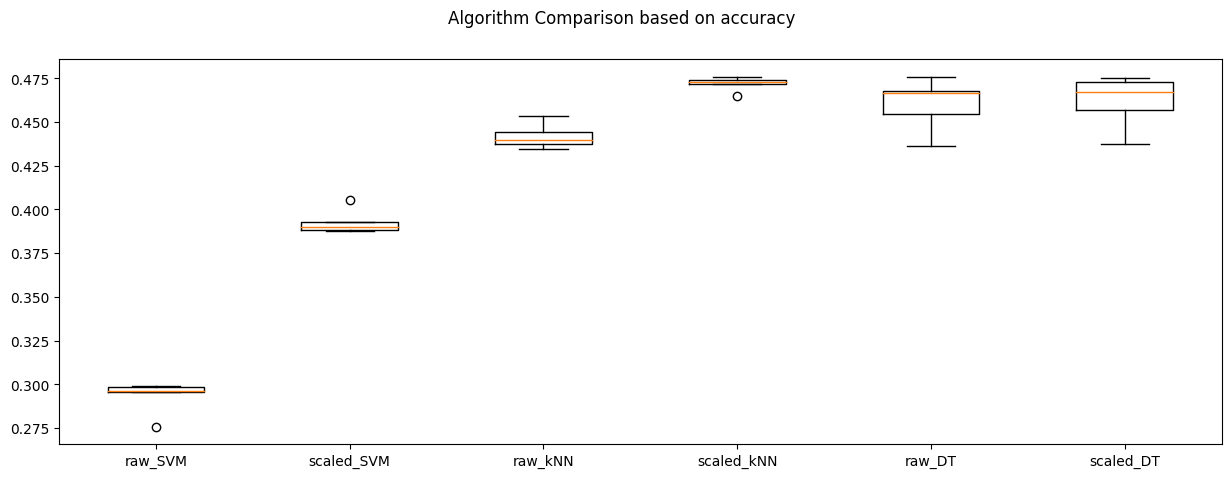

In [8]:
# Compare Algorithms
fig = pl.figure(figsize=(15, 5))
fig.suptitle("Algorithm Comparison based on %s" % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()

 ++++ Detailed classification report for the selected model ++++ 
Algorithm: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())]) 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


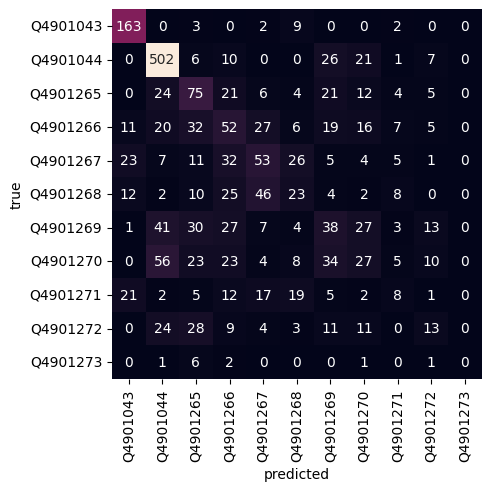


 clasification report:
               precision    recall  f1-score   support

    Q4901043       0.71      0.91      0.80       179
    Q4901044       0.74      0.88      0.80       573
    Q4901265       0.33      0.44      0.37       172
    Q4901266       0.24      0.27      0.25       195
    Q4901267       0.32      0.32      0.32       167
    Q4901268       0.23      0.17      0.20       132
    Q4901269       0.23      0.20      0.21       191
    Q4901270       0.22      0.14      0.17       190
    Q4901271       0.19      0.09      0.12        92
    Q4901272       0.23      0.13      0.16       103
    Q4901273       0.00      0.00      0.00        11

    accuracy                           0.48      2005
   macro avg       0.31      0.32      0.31      2005
weighted avg       0.43      0.48      0.45      2005

Cohen Kappa Score: 0.380815174098581


done 



/home/apwood/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apwood/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apwood/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Make predictions on test dataset
selected_model = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ ")
print("Algorithm: %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index=numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt="d", cbar=False)
pl.xlabel("predicted")
pl.ylabel("true")
pl.show()
#
print("\n clasification report:\n", classification_report(y_test, predictions))
print("Cohen Kappa Score:", cohen_kappa_score(y_test, predictions))
print("\n")
print("done \n")